### Take-home exercise

#### Pranisaa Charnparttaravanit
#### st121720

Apply the tech you've learned up till now to take Kaggle's 2013 [Dogs vs. Cats Challenge](https://www.kaggle.com/c/dogs-vs-cats). Download the training and test datasets and try to build the best PyTorch CNN you can for this dataset. Describe your efforts and the results in a brief lab report.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torch.cuda as cuda
import torch.nn as nn
# import cv2
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
import copy
import tqdm
from PIL import Image

%matplotlib inline
from torch.autograd import Variable
# The functional module contains helper functions for defining neural network layers as simple functions
import torch.nn.functional as F

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

train_dir = '../Lab10 -CNN/train'
test_dir = '../Lab10 -CNN/test'
train_files = os.listdir(train_dir)[:200]
test_files = os.listdir(test_dir)[:60]

In [3]:
print(train_files[1])
print(type(train_files))
print(len(train_files))

cat.10043.jpg
<class 'list'>
200


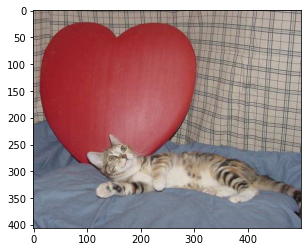

In [4]:
from PIL import Image
#Open image using Image module
im = Image.open(os.path.join(train_dir,train_files[1]))
#Show actual Image
plt.imshow(im)

In [5]:
# Desired mean and standard deviation

mean = 0.0
stddev = 1.0

# Transform input image

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean,), (stddev,))])

In [6]:
# cat_files = [i for i in range(len(train_files)) if 'cat' in train_files[i]]
# print(cat_files)
# dog_files = [i for i in range(len(train_files)) if 'dog' in train_files[i]]
# print(dog_files)

# labels = np.zeros(len(train_files))
# for idx in range(len(train_files)):
#     if 'cat' in train_files[idx]:
#         labels[idx] = 0 
#     else:
#         labels[idx] = 1
        
# labels.shape

# cond = labels == 0 
# train_files = np.array(train_files)
# cat_data = train_files[cond]
# print(cat_data)
# print(cat_data.shape)
# print(cat_data.reshape(-1,1))
# cat_data = transform(cat_data)

In [8]:
class CatDogDataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            else:
                self.label = 0
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else:
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]
        
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

# cat_files = [i for i in range(len(train_files)) if 'cat' in train_files[i]]
# print(cat_files)
# dog_files = [i for i in range(len(train_files)) if 'dog' in train_files[i]]
# print(dog_files)

cat_files = [tf for tf in train_files if 'cat' in tf]
dog_files = [tf for tf in train_files if 'dog' in tf]

cats = CatDogDataset(cat_files, train_dir, transform = data_transform)
dogs = CatDogDataset(dog_files, train_dir, transform = data_transform)

catdogs = ConcatDataset([cats, dogs])

In [9]:
dataloader = DataLoader(catdogs, batch_size = 32, shuffle=True, num_workers=4)

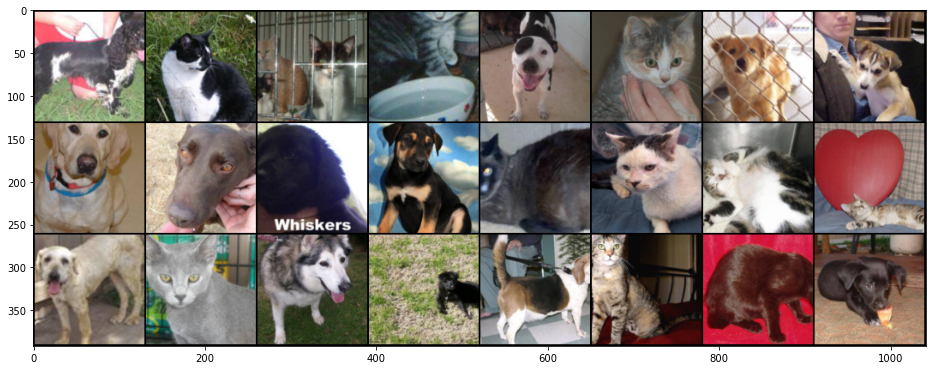

In [10]:
samples, labels = iter(dataloader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [1]:
device = 'cuda:1'
import os

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
model = torchvision.models.densenet121(pretrained=True)

NameError: name 'torchvision' is not defined

In [12]:
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 500),
    nn.Linear(500, 2)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, amsgrad=True)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[500,1000,1500], gamma=0.5)


[Epoch 1/20] Iteration 3 -> Train Loss: 0.6316, Accuracy: 0.781
[Epoch 1/20] Iteration 6 -> Train Loss: 1.6933, Accuracy: 0.562
[Epoch 2/20] Iteration 9 -> Train Loss: 0.9860, Accuracy: 0.500
[Epoch 2/20] Iteration 12 -> Train Loss: 0.6987, Accuracy: 0.469
[Epoch 3/20] Iteration 15 -> Train Loss: 0.8122, Accuracy: 0.688
[Epoch 3/20] Iteration 18 -> Train Loss: 0.6852, Accuracy: 0.594
[Epoch 3/20] Iteration 21 -> Train Loss: 0.4798, Accuracy: 0.875
[Epoch 4/20] Iteration 24 -> Train Loss: 0.8886, Accuracy: 0.688
[Epoch 4/20] Iteration 27 -> Train Loss: 0.8581, Accuracy: 0.750
[Epoch 5/20] Iteration 30 -> Train Loss: 0.4967, Accuracy: 0.875
[Epoch 5/20] Iteration 33 -> Train Loss: 0.6294, Accuracy: 0.781
[Epoch 6/20] Iteration 36 -> Train Loss: 0.7274, Accuracy: 0.750
[Epoch 6/20] Iteration 39 -> Train Loss: 0.8755, Accuracy: 0.594
[Epoch 6/20] Iteration 42 -> Train Loss: 0.4825, Accuracy: 0.750
[Epoch 7/20] Iteration 45 -> Train Loss: 0.5193, Accuracy: 0.688
[Epoch 7/20] Iteration 48 ->

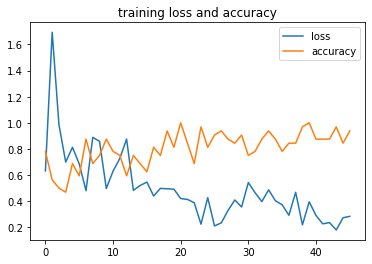

In [13]:
epochs = 20
itr = 1
p_itr = 3
model.train()
total_loss = 0
loss_list = []
acc_list = []
for epoch in range(epochs):
    for samples, labels in dataloader:
        samples, labels = samples.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(samples)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        scheduler.step()
        
        if itr%p_itr == 0:
            pred = torch.argmax(output, dim=1)
            correct = pred.eq(labels)
            acc = torch.mean(correct.float())
            print('[Epoch {}/{}] Iteration {} -> Train Loss: {:.4f}, Accuracy: {:.3f}'.format(epoch+1, epochs, itr, total_loss/p_itr, acc))
            loss_list.append(total_loss/p_itr)
            acc_list.append(acc)
            total_loss = 0
            
        itr += 1

plt.plot(loss_list, label='loss')
plt.plot(acc_list, label='accuracy')
plt.legend()
plt.title('training loss and accuracy')
plt.show()

In [14]:
# filename_pth = 'ckpt_densenet121_catdog.pth'
# torch.save(model.state_dict(), filename_pth)

test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

testset = CatDogDataset(test_files, test_dir, mode='test', transform = test_transform)
testloader = DataLoader(testset, batch_size = 32, shuffle=False, num_workers=4)

In [15]:
model.eval()
fn_list = []
pred_list = []
for x, fn in testloader:
    with torch.no_grad():
        x = x.to(device)
        output = model(x)
        pred = torch.argmax(output, dim=1)
        fn_list += [n[:-4] for n in fn]
        pred_list += [p.item() for p in pred]

submission = pd.DataFrame({"id":fn_list, "label":pred_list})
submission.to_csv('preds_densenet121.csv', index=False)
    

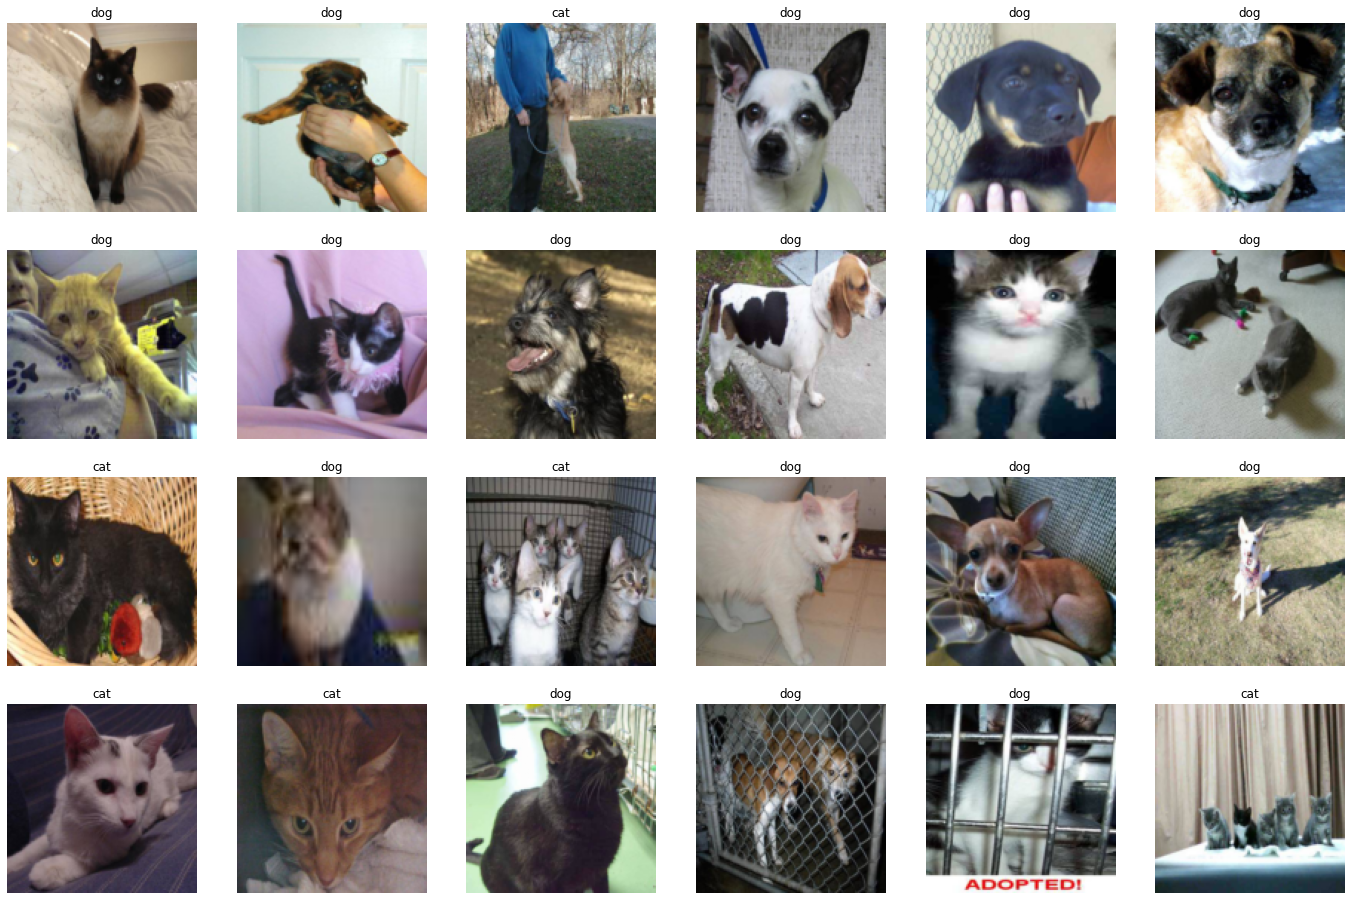

In [16]:
samples, _ = iter(testloader).next()
samples = samples.to(device)
fig = plt.figure(figsize=(24, 16))
fig.tight_layout()
output = model(samples[:24])
pred = torch.argmax(output, dim=1)
pred = [p.item() for p in pred]
ad = {0:'cat', 1:'dog'}
for num, sample in enumerate(samples[:24]):
    plt.subplot(4,6,num+1)
    plt.title(ad[pred[num]])
    plt.axis('off')
    sample = sample.cpu().numpy()
    plt.imshow(np.transpose(sample, (1,2,0)))

### Report

After I downloaded the dataset from kaggle, I realized that the size of the dataset is quite big. Due to that fact, i decided to import 200 pictures as my training data. 100 of which are of dog and the rest are cat photos. The size of my test set is 50. I also chose my epoch to be 20 to achieve a better accuracy. 

In this assignment densenet121 was adopted as the model for CNN

credit: https://www.kaggle.com/jaeboklee/pytorch-cat-vs-dog
